# **Normalização e Padronização de Dados:**

Vamos considerar o cenário de comparar cidades no Brasil (dados fictícios):
- temperatura: -5°C até 43°C
- umidade: 15% até 80%

Poderíamos ter algo assim:

Cidade | Temperatura | Umidade
:---|:---|:---
São Paulo | 21 | 70
São José do Rio Preto | 34 | 40
Santos | 30 | 80

As variáveis temperatura e umidade possuem intervalos diferentes:
- Temperatura: 21 a 34
- Umidade: 40 a 80

<font color='red'> **Será que elas possuem a mesma magnitude?** </font>

**Variáveis de maior magnitude tendem a dominar as de menor magnitude estatisticamente.** Assim, a variável umidade irá prevalecer sobre a temperatura durante o aprendizado em modelos preditivos.

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X = pd.DataFrame(iris.data)

print("Mínimo para o atributo 0: " + str(X[0].min()) + "; Máximo para o atributo 0: " + str(X[0].max()))
print("Mínimo para o atributo 1: " + str(X[1].min()) + "; Máximo para o atributo 1: " + str(X[1].max()))
print("Mínimo para o atributo 2: " + str(X[2].min()) + "; Máximo para o atributo 2: " + str(X[2].max()))
print("Mínimo para o atributo 3: " + str(X[3].min()) + "; Máximo para o atributo 3: " + str(X[3].max()))

print("\nVariação para o atributo 0:", X[0].max()-X[0].min())
print("Variação para o atributo 1:", X[1].max()-X[1].min())
print("Variação para o atributo 2:", X[2].max()-X[2].min())
print("Variação para o atributo 3:", X[3].max()-X[3].min())

Mínimo para o atributo 0: 4.3; Máximo para o atributo 0: 7.9
Mínimo para o atributo 1: 2.0; Máximo para o atributo 1: 4.4
Mínimo para o atributo 2: 1.0; Máximo para o atributo 2: 6.9
Mínimo para o atributo 3: 0.1; Máximo para o atributo 3: 2.5

Variação para o atributo 0: 3.6000000000000005
Variação para o atributo 1: 2.4000000000000004
Variação para o atributo 2: 5.9
Variação para o atributo 3: 2.4


**Normalização Min-Max.** Normaliza o atributo para estar compreendido no intervalo $[a,b]$:

$$x' = a+\frac{[x-\min(x)](b-a)}{\max(x)-\min(x)}$$

Assumindo o intervalo $[0,1]$:
 
$$x' = \frac{x-\min(x)}{\max(x)-\min(x)}$$

**Normalização pela Média.** Normaliza o atributo centralizando-o em relação à média, em que $\bar{x}$ é a média entre todos os valores de $x$:

$$x' = \frac{x-\bar{x}}{\max(x)-\min(x)}$$

**Padronização Z-Score.** Normaliza o atributo centralizando-o em relação à média ($\bar{x}$), em que o desvio padrão ($\sigma$) é unitário:

$$x' = \frac{x-\bar{x}}{\sigma},$$

In [2]:
print("Valores originais para o atributo 0:")
media = X[0].mean()
desvio = X[0].std()
print("Mínimo: " + str(X[0].min()) + "; Máximo: " + str(X[0].max()))
print("Variação:", X[0].max()-X[0].min())
print("Média:", media)
print("Desvio Padrão:", desvio)

print("\nNormalização Min-Max [0,1]")
X0 = (X[0] - X[0].min()) / (X[0].max()-X[0].min())
print("Mínimo: " + str(X0.min()) + "; Máximo: " + str(X0.max()))
print("Variação:", X0.max()-X0.min())
print("Média:", X0.mean())
print("Desvio padrão:", X0.std())

print("\nNormalização pela Média [-1,1]")
X0 = (X[0] - media) / (X[0].max()-X[0].min())
print("Mínimo: " + str(X0.min()) + "; Máximo: " + str(X0.max()))
print("Variação:", X0.max()-X0.min())
print("Média:", X0.mean())
print("Desvio padrão:", X0.std())

print("\nPadronização z-score")
X0 = (X[0] - media) / desvio
print("Mínimo: " + str(X0.min()) + "; Máximo: " + str(X0.max()))
print("Variação:", X0.max()-X0.min())
print("Média:", X0.mean())
print("Desvio padrão:", X0.std())

Valores originais para o atributo 0:
Mínimo: 4.3; Máximo: 7.9
Variação: 3.6000000000000005
Média: 5.843333333333335
Desvio Padrão: 0.8280661279778629

Normalização Min-Max [0,1]
Mínimo: 0.0; Máximo: 1.0
Variação: 1.0
Média: 0.4287037037037038
Desvio padrão: 0.23001836888273963

Normalização pela Média [-1,1]
Mínimo: -0.42870370370370403; Máximo: 0.571296296296296
Variação: 1.0
Média: -2.820891668401752e-16
Desvio padrão: 0.23001836888273963

Padronização z-score
Mínimo: -1.863780296269519; Máximo: 2.4836985805578653
Variação: 4.347478876827385
Média: -1.457167719820518e-15
Desvio padrão: 1.0000000000000004


**Observações:**
- Quando o desvio padrão do atributo é pequeno, uma boa estratégia é fazer a normalização dos dados.
- A padronização z-score garante média igual a 0 e desvio padrão igual a 1, posicionando a variável na Distribuição Normal.
- Deve-se aplicar o mesmo processo em todos os atributos para que fiquem na mesma magnitude.
- Um problema recorrente em normalização é a perda de significado para interpretação da variável. Por exemplo, altura e peso negativos após a normalização parecem incorretos, mas a nova projeção é justificada para ser utilizada em modelos preditivos.

# **Codificação de Dados:**

Variáveis categóricas não são diretamente aplicadas em modelos estatísticos e computacionais. Assim, discretizá-las é um meio de aplicar estes dados nos modelos.

Visão geral dos dados:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca        thal  target  
0   0       fixed       0  
1   3      normal       1  
2   2  reversible       0  
3   0      normal       0  
4   0      normal       0  

Valores categóricos contidos no atributo thal:
['fixed' 'normal' 'reversible' '1' '2']

Visualização dos valores no atributo thal:


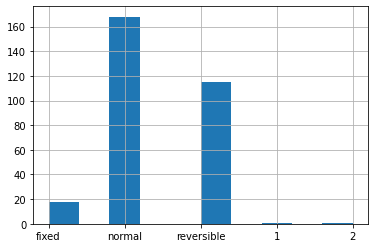

In [3]:
import matplotlib.pyplot as plt

# vamos estudar o Cleveland Clinic Foundation for Heart Disease dataset
data = pd.read_csv("http://storage.googleapis.com/download.tensorflow.org/data/heart.csv")

print("Visão geral dos dados:")
print(data.head())

print("\nValores categóricos contidos no atributo thal:")
print(data['thal'].unique())

print("\nVisualização dos valores no atributo thal:")
data['thal'].hist()
plt.show()


Valores categóricos contidos no atributo thal:
['fixed' 'normal' 'reversible']

Visualização dos valores no atributo thal:


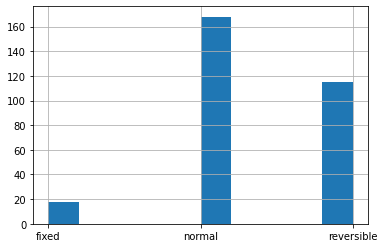

In [5]:
# aparentemente instâncias com valores '1' e '2' são discrepantes
data = data[(data['thal']!='1')&(data['thal']!='2')]

print("\nValores categóricos contidos no atributo thal:")
print(data['thal'].unique())

print("\nVisualização dos valores no atributo thal:")
data['thal'].hist()
plt.show()

Uma forma de discretizar variáveis categórias é por meio de uma escala direta de valores. Por exemplo:
- fixed = 1
- normal = 2
- reversible = 3

<font color='red'> **Qual o problema de utilizarmos esta abordagem?** </font>

A solução mais viável é transformar cada valor existente em uma variável binária, indicando ou não a presença deste valor:

In [6]:
# o método get_dummies faz esta configuração para nós:
dummy_vars = pd.get_dummies(data['thal'])
newData = pd.concat([data['thal'], dummy_vars], axis=1, sort=False)
print(newData)

           thal  fixed  normal  reversible
0         fixed      1       0           0
1        normal      0       1           0
2    reversible      0       0           1
3        normal      0       1           0
4        normal      0       1           0
..          ...    ...     ...         ...
298       fixed      1       0           0
299  reversible      0       0           1
300  reversible      0       0           1
301  reversible      0       0           1
302  reversible      0       0           1

[301 rows x 4 columns]


Assim, ao invés de considerarmos o atributo "thal", consideramos somente suas respectivas codificações.

Este método também chamado de **one-hot encoding**!

# **Outliers:**

**Outliers, pontos "fora-da-curva" ou pontos aberrantes** são exemplos ou instâncias que:
- dentre do espaço de possíveis valores, recaem num intervalo *fora* daquele relativo a maior parte dos exemplos de uma base de dados.
- desvia tanto das outras observações que levanta suspeita de que foi gerada por um mecanismo diferenciado;
- são meramente uma manifestação extrema da variedade aleatória inerente aos dados;
- são resultados de um desvio grosseiro do procedimento experimental.

# **Dados desbalanceados:**

Alguns modelos de aprendizado tendem a ponderar para categorias que possuem mais exemplos, ou seja, para a classe majoritária. Assim, o desbalanceamento pode prejudicar severamente o aprendizado dos modelos preditivos.

**Como tratar o desbalanceamento?**
- subamostragem, removendo exemplos da classe majoritária;
- aumentação ou sobreamostragem, criando novos exemplos da classe minoritária;
- fazendo combinações de ambas as abordagens.

# **Leituras complementares:**
* Documentação sklearn para tratamento de dados (https://scikit-learn.org/stable/data_transforms.html)